In [254]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import math as m
rng = np.random.default_rng()

In [255]:
############################################
############ Fixed Parameters ##############
############################################

C = 6_000 # Pa
phi = deg_to_rad(38) # radians
pw = 1_000 # kg/m^3
ps = 1_800 # kg/m^3
h_over_z = 0.8 # proportion of saturated soil
g = 9.81 # m/s^s
D = 0.004 # m^2/yr
Sc = 1.25
start_alpha = 30 # degrees
alpha_interval = 0.05 # degrees

In [256]:
############################################
############ Needed Functions ##############
############################################

def deg_to_rad(angle):
    return angle * m.pi / 180

def z_crit(theta, C=C, ps=ps, g=g, phi=phi, pw=pw, h_over_z=h_over_z):
    cos2_theta = m.cos(theta) ** 2
    tan_theta = m.tan(theta)
    tan_phi = m.tan(phi)
    pw_over_ps = pw / ps
    return C / (ps * g * cos2_theta * (tan_theta - tan_phi * (1 - (h_over_z * pw_over_ps))))

def get_K(D, alpha, Sc=Sc):
    tan_alpha = m.tan(alpha)
    return D / (1 - ((tan_alpha / Sc) ** 2))

def get_beta(theta, alpha):
    cos_theta = m.cos(theta)
    cos2_theta = cos_theta ** 2
    tan2_theta = m.tan(theta) ** 2
    tan2_alpha = m.tan(alpha) ** 2
    cos2_alpha = m.cos(alpha) ** 2
    
    return m.sqrt((cos_theta) * m.sqrt(tan2_alpha - tan2_theta) * m.sqrt((cos2_theta / cos2_alpha) - 1))

def get_theta(alpha):
    return 0.8 * alpha

def recurrence_interval(zc, K, beta):
    return (zc ** 2) / (2 * K * (beta ** 2))

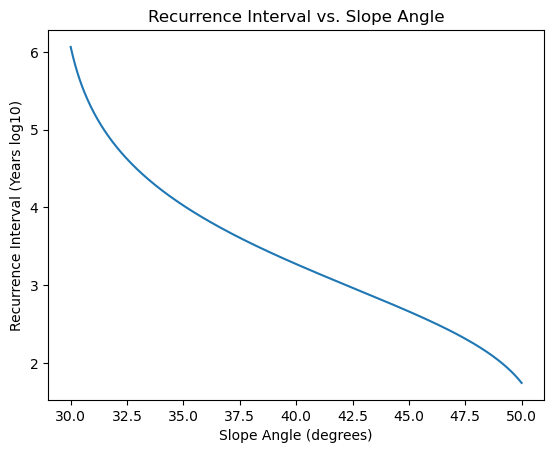

In [257]:
############################################
################# Part 1 ###################
############################################

n = int((50-start_alpha) / alpha_interval) + 1
alphas = np.arange(start_alpha, 50+alpha_interval, alpha_interval)
alpha_rads = deg_to_rad(alphas)
recurrence_intervals = np.zeros(n, dtype=float)

i = 0
for alpha in alpha_rads:
    theta = get_theta(alpha)
    beta = get_beta(theta, alpha)
    K = get_K(D, alpha, Sc)
    zc = z_crit(theta)
    
    recurrence_intervals[i] = recurrence_interval(zc, K, beta)
    
    i += 1
log_intervals = np.log10(recurrence_intervals)
plt.plot(alphas, log_intervals)
plt.title("Recurrence Interval vs. Slope Angle")
plt.ylabel("Recurrence Interval (Years log10)")
plt.xlabel("Slope Angle (degrees)");
plt.savefig(f"./MidtermPlots/TfVsAlpha.jpg") 


In [258]:
############################################
########## Uniform Distributions ###########
############################################

size_uni = 100_000

C_uni = rng.uniform(low=2_000,  high=18_000, size=size_uni) # Pa
phi_uni = deg_to_rad(rng.uniform(low=33, high=40, size=size_uni)) # degrees
h_over_z_uni = rng.uniform(low=0.8, high=1.0, size=size_uni) # soil saturation
D_uni = rng.uniform(low=0.001, high=0.01, size=size_uni) # m^2 / year

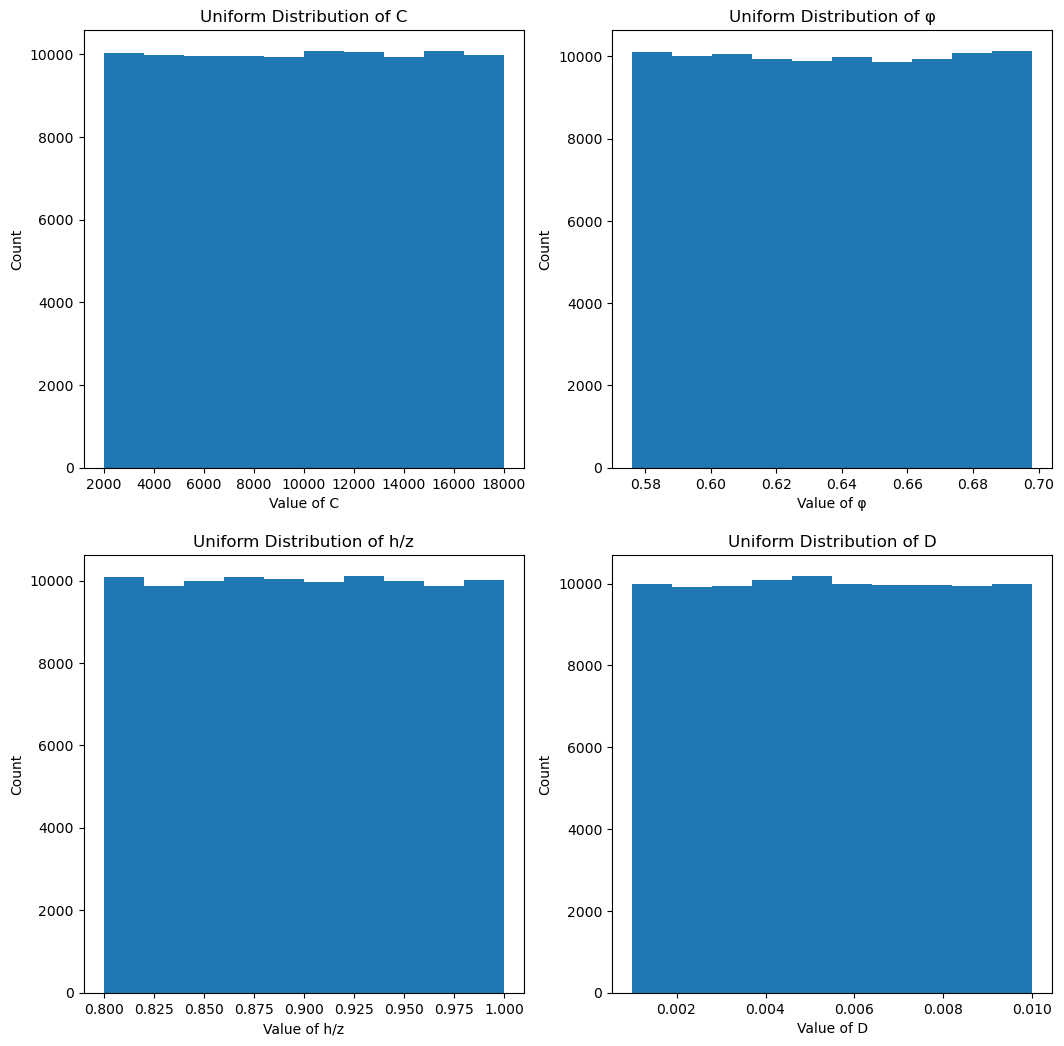

In [259]:
############################################
################ Part 2.1 ##################
############################################

fig, ax = plt.subplots(2, 2, figsize=(12.5, 12.5))
unis = np.array([C_uni, phi_uni, h_over_z_uni, D_uni])
consts = np.array(['C', 'φ', 'h/z', 'D'])

k = 0
for i in np.arange(2):
    for j in np.arange(2):
        pl = ax[i][j]
        pl.hist(unis[k], bins=10)
        pl.set_title(f"Uniform Distribution of {consts[k]}")
        pl.set_xlabel(f"Value of {consts[k]}")
        pl.set_ylabel("Count")

        k += 1
plt.savefig(f"./MidtermPlots/UniDistros.jpg") 

The mean with alpha=32 degrees is 67045 years and the std is 196358 years.
The mean with alpha=37 degrees is 8651 years and the std is 12073 years.
The mean with alpha=40 degrees is 3889 years and the std is 5092 years.


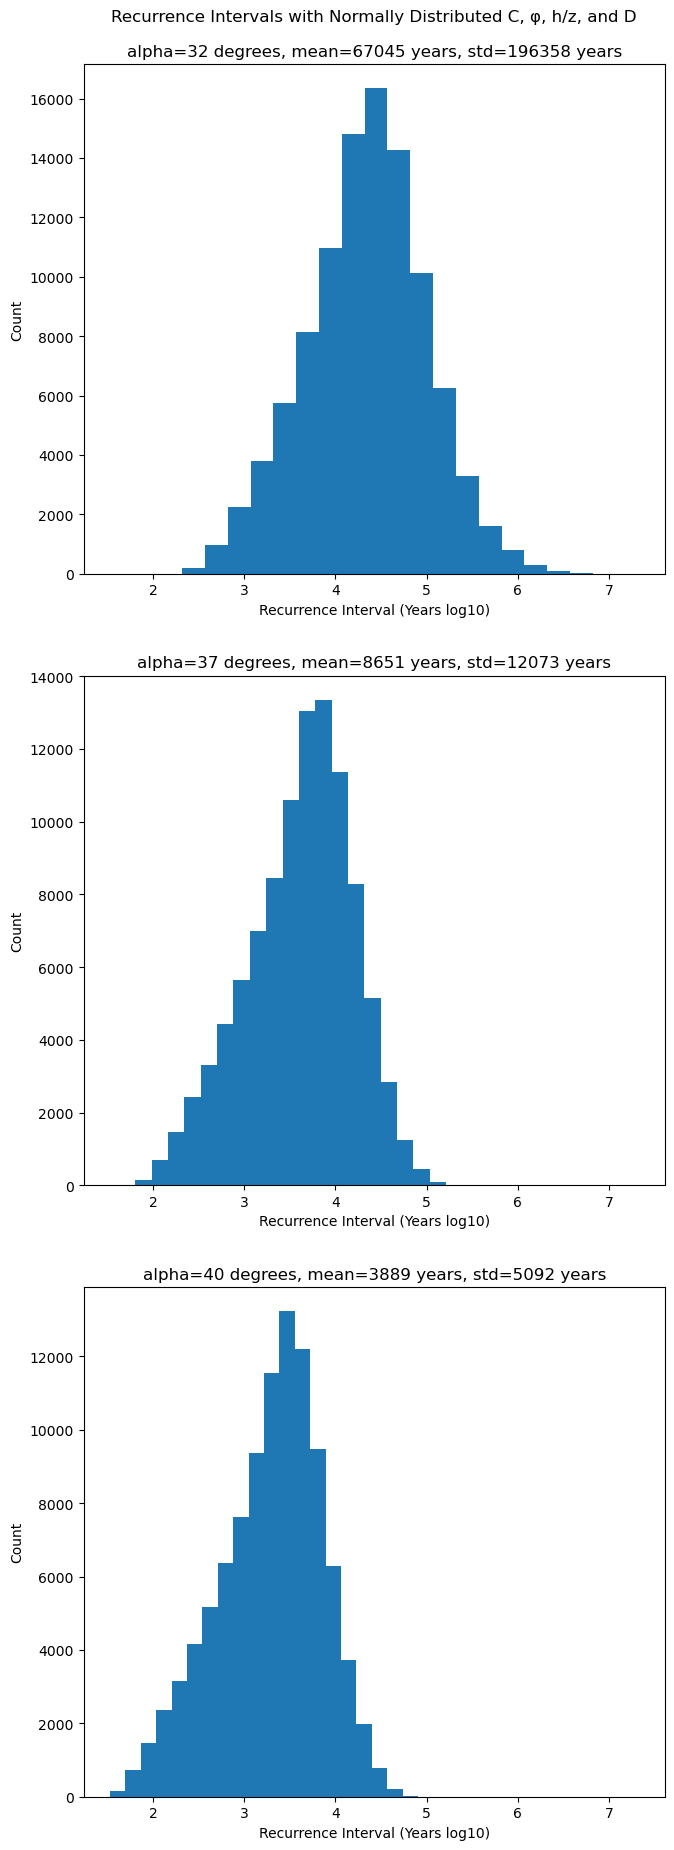

In [268]:
############################################
############### Part 2.2/3 #################
############################################

alpha_degs = np.array([32, 37, 40]) # degrees
alphas = np.array(deg_to_rad(alpha_degs))

fig, ax = plt.subplots(3, 1, figsize=(7.5, 22.5), sharex=True)

j = 0

for alpha, alpha_deg in zip(alphas, alpha_degs):
    theta = get_theta(alpha)
    beta = get_beta(theta, alpha)
    recurrence_intervals = np.zeros(size_uni)
    i = 0
    for C_u, phi_u, h_over_z_u, D_u in zip(C_uni, phi_uni, h_over_z_uni, D_uni):
        K = get_K(D_u, alpha)
        zc = z_crit(theta, C=C_u, phi=phi_u, h_over_z=h_over_z_u)
        recurrence_intervals[i] = recurrence_interval(zc, K, beta)
        i += 1
    log_intervals = np.log10(recurrence_intervals)
    mean = np.round(np.mean(recurrence_intervals))
    std = np.round(np.std(recurrence_intervals))
    
    ax[j].hist(log_intervals, bins=20)
    ax[j].set_xlabel("Recurrence Interval (Years log10)")
    ax[j].set_ylabel("Count")
    ax[j].xaxis.set_tick_params(which='both', labelbottom=True)
    if j == 0:
        ax[j].set_title(f"Recurrence Intervals with Normally Distributed C, φ, h/z, and D\n\nalpha={alpha_deg} degrees, mean={mean:.0f} years, std={std:.0f} years")
    else:    
        ax[j].set_title(f"alpha={alpha_deg} degrees, mean={mean:.0f} years, std={std:.0f} years")
    
    print(f"The mean with alpha={alpha_deg} degrees is {np.round(np.mean(recurrence_intervals)):.0f} years and the std is {np.round(np.std(recurrence_intervals)):.0f} years.")
    j += 1
plt.savefig(f"./MidtermPlots/UniVaryingAlpha.jpg") 

The mean with constant C is 2558 years and the std is 2324 years.
The mean with constant phi is 16693 years and the std is 20119 years.
The mean with constant h/z is 13890 years and the std is 19161 years.
The mean with constant D is 13565 years and the std is 12820 years.


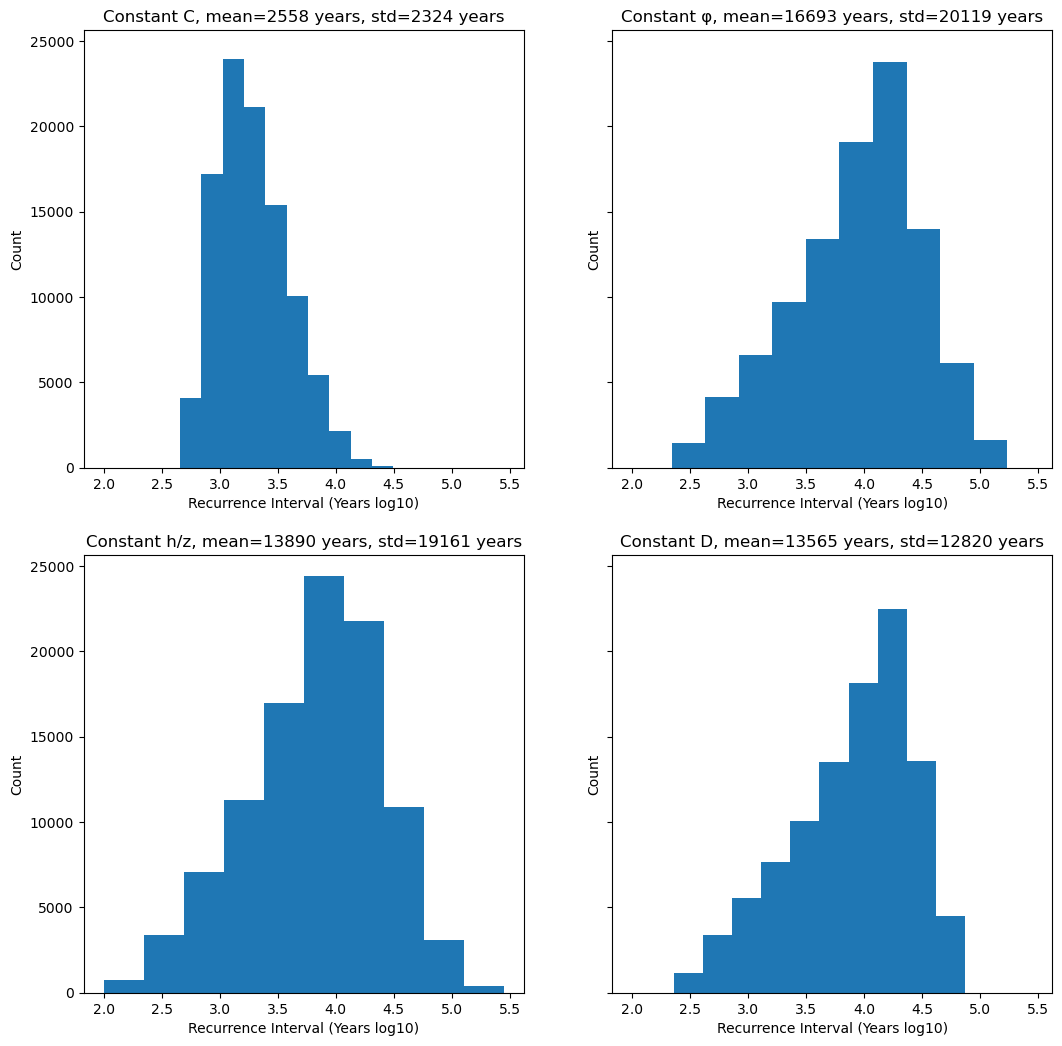

In [261]:
############################################
################ Part 2.4 ##################
############################################

alpha_deg = 37 # degrees
alpha = deg_to_rad(alpha_deg)
theta = get_theta(alpha)
beta = get_beta(theta, alpha)

fig, ax = plt.subplots(2, 2, figsize=(12.5, 12.5), sharex=True, sharey=True)

# CONSTANT C
recurrence_intervals_1 = np.zeros(size_uni)
i = 0

for phi_u, h_over_z_u, D_u in zip(phi_uni, h_over_z_uni, D_uni):
    K = get_K(D_u, alpha)
    zc = z_crit(theta, C=C, phi=phi_u, h_over_z=h_over_z_u)
    recurrence_intervals_1[i] = recurrence_interval(zc, K, beta)
    i += 1
    
print(f"The mean with constant C is {np.round(np.mean(recurrence_intervals_1)):.0f} years and the std is {np.round(np.std(recurrence_intervals_1)):.0f} years.")
log_intervals_1 = np.log10(recurrence_intervals_1)

# CONSTANT φ
recurrence_intervals_2 = np.zeros(size_uni)
i = 0

for C_u, h_over_z_u, D_u in zip(C_uni, h_over_z_uni, D_uni):
    K = get_K(D_u, alpha)
    zc = z_crit(theta, C=C_u, phi=phi)
    recurrence_intervals_2[i] = recurrence_interval(zc, K, beta)
    i += 1
    
log_intervals_2 = np.log10(recurrence_intervals_2)
print(f"The mean with constant phi is {np.round(np.mean(recurrence_intervals_2)):.0f} years and the std is {np.round(np.std(recurrence_intervals_2)):.0f} years.")

# CONSTANT H/Z
recurrence_intervals_3 = np.zeros(size_uni)
i = 0

for C_u, phi_u, D_u in zip(C_uni, phi_uni, D_uni):
    K = get_K(D_u, alpha)
    zc = z_crit(theta, C=C_u, phi=phi_u, h_over_z=h_over_z)
    recurrence_intervals_3[i] = recurrence_interval(zc, K, beta)
    i += 1
    
log_intervals_3 = np.log10(recurrence_intervals_3)
print(f"The mean with constant h/z is {np.round(np.mean(recurrence_intervals_3)):.0f} years and the std is {np.round(np.std(recurrence_intervals_3)):.0f} years.")

# CONSTANT D
recurrence_intervals_4 = np.zeros(size_uni)
i = 0

for C_u, phi_u, h_over_z_u in zip(C_uni, phi_uni, h_over_z_uni):
    K = get_K(D, alpha)
    zc = z_crit(theta, C=C_u, phi=phi_u)
    recurrence_intervals_4[i] = recurrence_interval(zc, K, beta)
    i += 1
    
log_intervals_4 = np.log10(recurrence_intervals_4)
print(f"The mean with constant D is {np.round(np.mean(recurrence_intervals_4)):.0f} years and the std is {np.round(np.std(recurrence_intervals_4)):.0f} years.")

intervals = np.array([log_intervals_1, log_intervals_2, log_intervals_3, log_intervals_4])

k = 0
for i in np.arange(2):
    for j in np.arange(2):
        pl = ax[i][j]
        pl.hist(intervals[k], bins=10)
        pl.set_title(f"Constant {consts[k]}, mean={np.round(np.mean(10**intervals[k])):.0f} years, std={np.round(np.std(10**intervals[k])):.0f} years")
        pl.set_xlabel("Recurrence Interval (Years log10)")
        pl.set_ylabel("Count")
        pl.xaxis.set_tick_params(which='both', labelbottom=True)

        k += 1

plt.savefig(f"./MidtermPlots/UniConstants.jpg") 

In [262]:
############################################
########## Normal Distributions ###########
############################################

size_uni = 100_000

C_norm = rng.normal(loc=10_000, scale=8_000/3, size=size_uni) # Pa
phi_norm = deg_to_rad(rng.normal(loc=36.5, scale=3.5/3, size=size_uni)) # degrees
h_over_z_norm = rng.normal(loc=0.9, scale=0.1/3, size=size_uni) # soil saturation
D_norm = rng.normal(loc=0.0055, scale=0.005/3, size=size_uni) # m^2 / year

C_norm[C_norm < 2_000] = rng.uniform(low=2_000, high=3_000); C_norm[C_norm > 18_000] = rng.uniform(low=17_000, high=18_000);
phi_norm[phi_norm < deg_to_rad(33)] = deg_to_rad(rng.uniform(low=33, high=35)); phi_norm[phi_norm > deg_to_rad(40)] = deg_to_rad(rng.uniform(low=38, high=40));
h_over_z_norm[h_over_z_norm < 0.8] = rng.uniform(low=0.8, high=0.825); h_over_z_norm[h_over_z_norm > 1] = rng.uniform(low=0.975, high=1);
D_norm[D_norm < 0.001] = rng.uniform(low=0.001, high=0.0025); D_norm[D_norm > 0.01] = rng.uniform(low=0.00975, high=0.01);

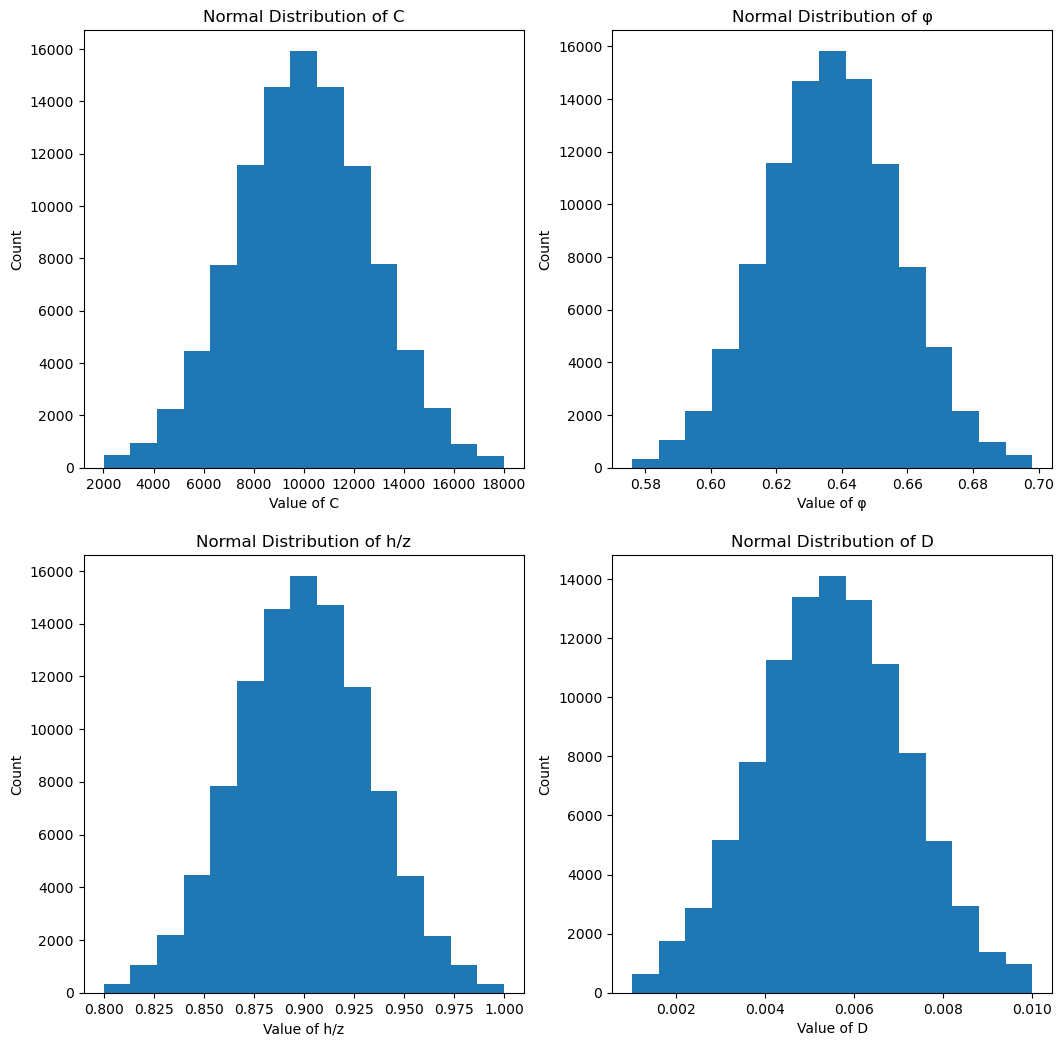

In [263]:
############################################
################ Part 2.6 ##################
############################################

fig, ax = plt.subplots(2, 2, figsize=(12.5, 12.5))
norms = np.array([C_norm, phi_norm, h_over_z_norm, D_norm])

k = 0
for i in np.arange(2):
    for j in np.arange(2):
        pl = ax[i][j]
        pl.hist(norms[k], bins=15)
        pl.set_title(f"Normal Distribution of {consts[k]}")
        pl.set_xlabel(f"Value of {consts[k]}")
        pl.set_ylabel("Count")

        k += 1
plt.savefig(f"./MidtermPlots/NormalDistros.jpg") 

The mean with alpha=32 degrees is 29278 years and the std is 27820 years.
The mean with alpha=37 degrees is 5578 years and the std is 4174 years.
The mean with alpha=40 degrees is 2601 years and the std is 1891 years.


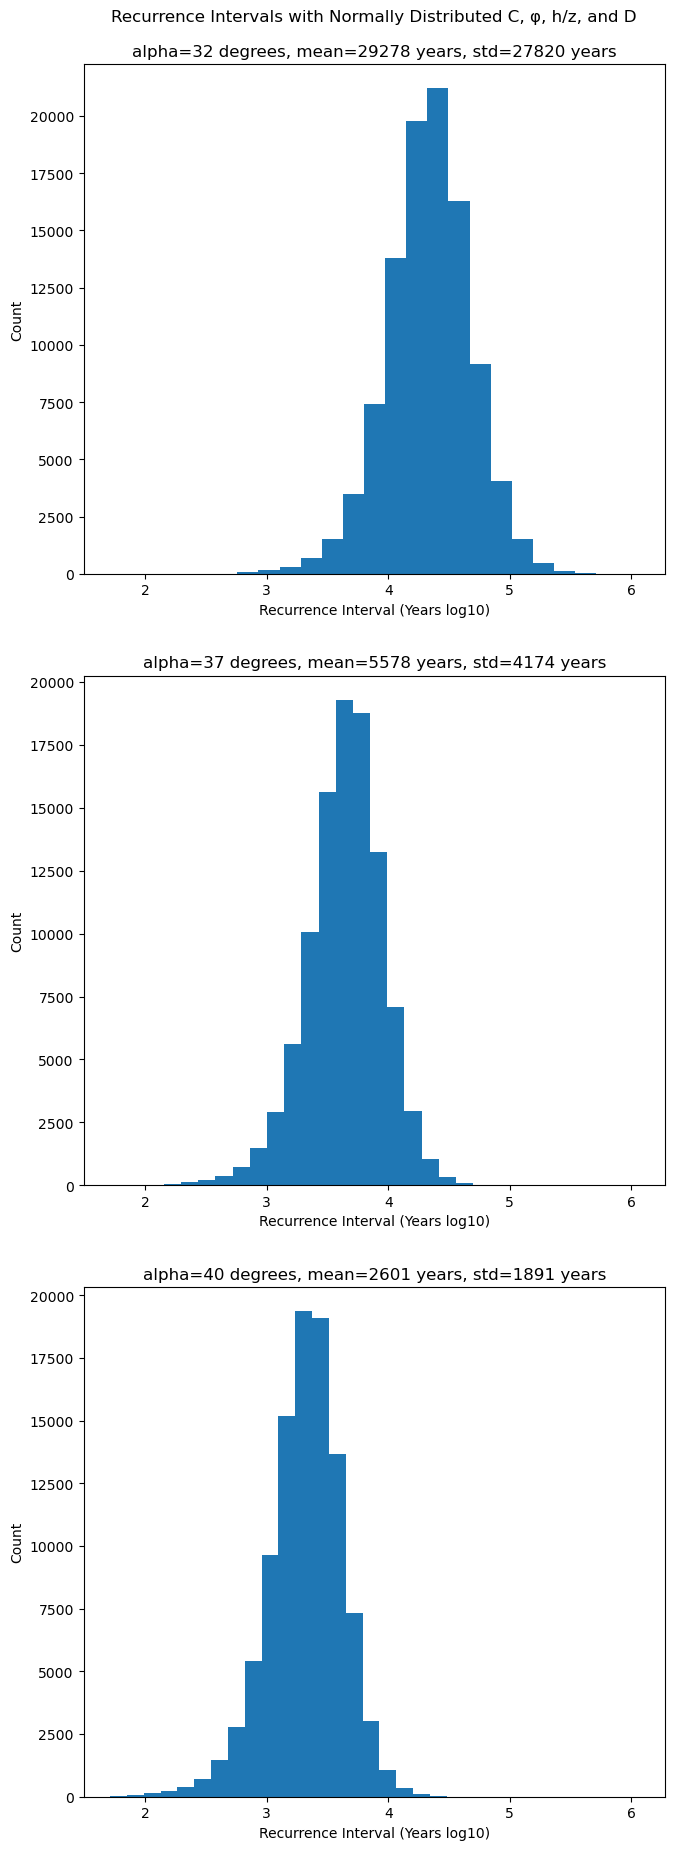

In [264]:
alpha_degs = np.array([32, 37, 40]) # degrees
alphas = np.array(deg_to_rad(alpha_degs))

fig, ax = plt.subplots(3, 1, figsize=(7.5, 22.5), sharex=True)

j = 0

for alpha, alpha_deg in zip(alphas, alpha_degs):
    theta = get_theta(alpha)
    beta = get_beta(theta, alpha)
    recurrence_intervals = np.zeros(size_uni)
    i = 0
    for C_u, phi_u, h_over_z_u, D_u in zip(C_norm, phi_norm, h_over_z_norm, D_norm):
        K = get_K(D_u, alpha)
        zc = z_crit(theta, C=C_u, phi=phi_u, h_over_z=h_over_z_u)
        recurrence_intervals[i] = recurrence_interval(zc, K, beta)
        i += 1
    log_intervals = np.log10(recurrence_intervals)
    mean = np.round(np.mean(recurrence_intervals))
    std = np.round(np.std(recurrence_intervals))
    
    ax[j].hist(log_intervals, bins=20)
    ax[j].set_xlabel("Recurrence Interval (Years log10)")
    ax[j].set_ylabel("Count")
    ax[j].xaxis.set_tick_params(which='both', labelbottom=True)

    if j == 0:
        ax[j].set_title(f"Recurrence Intervals with Normally Distributed C, φ, h/z, and D\n\nalpha={alpha_deg} degrees, mean={mean:.0f} years, std={std:.0f} years")
    else:    
        ax[j].set_title(f"alpha={alpha_deg} degrees, mean={mean:.0f} years, std={std:.0f} years")
    print(f"The mean with alpha={alpha_deg} degrees is {mean:.0f} years and the std is {std:.0f} years.")
    j += 1
plt.savefig(f"./MidtermPlots/NormalVaryingAlpha.jpg") 

The mean with constant C is 1874 years and the std is 925 years.
The mean with constant phi is 11730 years and the std is 8197 years.
The mean with constant h/z is 8921 years and the std is 6717 years.
The mean with constant D is 10936 years and the std is 6242 years.


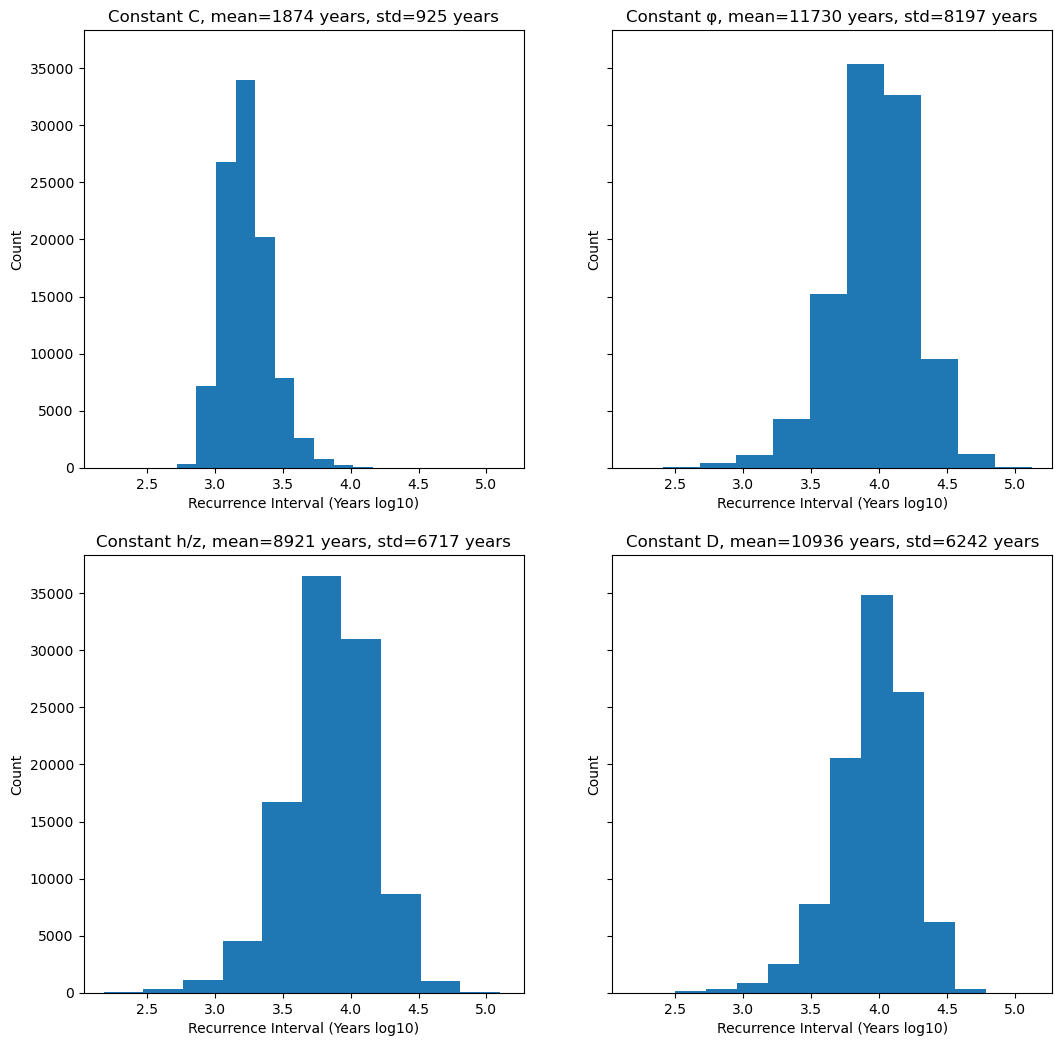

In [267]:
alpha_deg = 37 # degrees
alpha = deg_to_rad(alpha_deg)
theta = get_theta(alpha)
beta = get_beta(theta, alpha)

fig, ax = plt.subplots(2, 2, figsize=(12.5, 12.5), sharex=True, sharey=True)

# CONSTANT C
recurrence_intervals_1 = np.zeros(size_uni)
i = 0

for phi_u, h_over_z_u, D_u in zip(phi_norm, h_over_z_norm, D_norm):
    K = get_K(D_u, alpha)
    zc = z_crit(theta, C=C, phi=phi_u, h_over_z=h_over_z_u)
    recurrence_intervals_1[i] = recurrence_interval(zc, K, beta)
    i += 1
    
print(f"The mean with constant C is {np.round(np.mean(recurrence_intervals_1)):.0f} years and the std is {np.round(np.std(recurrence_intervals_1)):.0f} years.")
log_intervals_1 = np.log10(recurrence_intervals_1)

# CONSTANT φ
recurrence_intervals_2 = np.zeros(size_uni)
i = 0

for C_u, h_over_z_u, D_u in zip(C_norm, h_over_z_norm, D_norm):
    K = get_K(D_u, alpha)
    zc = z_crit(theta, C=C_u, phi=phi)
    recurrence_intervals_2[i] = recurrence_interval(zc, K, beta)
    i += 1
    
log_intervals_2 = np.log10(recurrence_intervals_2)
print(f"The mean with constant phi is {np.round(np.mean(recurrence_intervals_2)):.0f} years and the std is {np.round(np.std(recurrence_intervals_2)):.0f} years.")

# CONSTANT H/Z
recurrence_intervals_3 = np.zeros(size_uni)
i = 0

for C_u, phi_u, D_u in zip(C_norm, phi_norm, D_norm):
    K = get_K(D_u, alpha)
    zc = z_crit(theta, C=C_u, phi=phi_u, h_over_z=h_over_z)
    recurrence_intervals_3[i] = recurrence_interval(zc, K, beta)
    i += 1
    
log_intervals_3 = np.log10(recurrence_intervals_3)
print(f"The mean with constant h/z is {np.round(np.mean(recurrence_intervals_3)):.0f} years and the std is {np.round(np.std(recurrence_intervals_3)):.0f} years.")

# CONSTANT D
recurrence_intervals_4 = np.zeros(size_uni)
i = 0

for C_u, phi_u, h_over_z_u in zip(C_norm, phi_norm, h_over_z_norm):
    K = get_K(D, alpha)
    zc = z_crit(theta, C=C_u, phi=phi_u)
    recurrence_intervals_4[i] = recurrence_interval(zc, K, beta)
    i += 1
    
log_intervals_4 = np.log10(recurrence_intervals_4)
print(f"The mean with constant D is {np.round(np.mean(recurrence_intervals_4)):.0f} years and the std is {np.round(np.std(recurrence_intervals_4)):.0f} years.")

intervals = np.array([log_intervals_1, log_intervals_2, log_intervals_3, log_intervals_4])

consts = np.array(['C', 'φ', 'h/z', 'D'])
k = 0
for i in np.arange(2):
    for j in np.arange(2):
        mean = np.round(np.mean(10 ** intervals[k]))
        std = np.round(np.std(10 ** intervals[k]))
        pl = ax[i][j]
        pl.hist(intervals[k])
        pl.set_title(f"Constant {consts[k]}, mean={mean:.0f} years, std={std:.0f} years")
        pl.set_xlabel("Recurrence Interval (Years log10)")
        pl.set_ylabel("Count")
        pl.xaxis.set_tick_params(which='both', labelbottom=True)
        k += 1
plt.savefig(f"./MidtermPlots/NormalConstants.jpg") 